In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from tqdm import tqdm
import scipy.integrate as integ
%matplotlib inline

In [4]:
def Ar_trap(f,a,b):
    return 0.5*(b-a)*(f(a)+f(b))

def Ar_simp(f,a,b):
    xn=np.linspace(a,b,3)
    h=xn[1]-xn[0]
    return(h/3.)*(f(xn[0])+4*f(xn[1])+f(xn[2]))

# Integrales impropias

### Divergencia en el limite inferior:

$$\int_a^{b} dx \frac{g(x)}{(x-a)^p}$$

La integral sobre $[a,b]$ converge si $0<p<1$ 

$$P_4(x)=g(a)+g'(a)(x-a)+\frac{g''(a)}{2}(x-a)^2+\frac{g'''(a)}{3!}(x-a)^3+\frac{g''''(a)}{4!}(x-a)^4$$

$$\int_a^{b} dx \frac{g(x)}{(x-a)^p} = \int_a^{b} dx \frac{g(x)-P_4(x)}{(x-a)^p}+ \int_a^{b} dx \frac{P_4(x)}{(x-a)^p}$$

#### Ejemplo

$$\int_0^{\pi} dx \frac{\sin{x}}{\sqrt{x}}$$

fs: x**(-0.5)*sin(x)
g(x): sin(x)
P4(x): -x**3/6 + x
(g(x)-P4)/den: x**(-0.5)*sin(x) - x**0.5 + x**2.5/6
P4(x)/den: x**0.5 - x**2.5/6


<string>:2: RuntimeWarning: divide by zero encountered in power
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: divide by zero encountered in power
<string>:2: RuntimeWarning: invalid value encountered in multiply


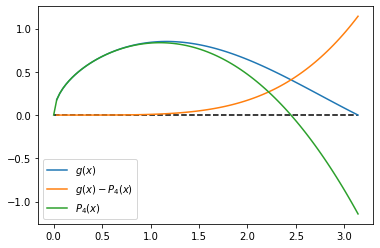

In [5]:
x=Symbol('x')
a=0
b=np.pi

gs=sin(x)
den=(x-a)**(1/2)
fs=gs/den

print('fs:',fs)

P4=series(gs,x0=a,n=5,x=None)
P4=P4.removeO()

print('g(x):',gs)
print('P4(x):',P4)

f1s=(gs-P4)/den
f2s=(P4)/den

f1s=expand(f1s)
f2s=expand(f2s)

print('(g(x)-P4)/den:',f1s)
print('P4(x)/den:',f2s)


f=lambdify(x,fs,'numpy')
f1=lambdify(x,f1s,'numpy')
f2=lambdify(x,f2s,'numpy')



xreal=np.linspace(a,b,100)

plt.plot(xreal,f(xreal),label='$g(x)$')
plt.plot(xreal,f1(xreal),label='$g(x)-P_4(x)$')
plt.plot(xreal,f2(xreal),label='$P_4(x)$')
plt.hlines(0,a,b,linestyles='dashed')
plt.legend()
#plt.ylim(-0.1,0.1)

#### Primera integral

Se usa el límite

$$\lim_{x\to a} \frac{g(x)-P_4(x)}{(x-a)^p} =0 $$

$$\frac{g(x)-P_4(x)}{(x-a)^p}=\begin{cases}
0 & \text{Si } x=a \\
\frac{g(x)-P_4(x)}{(x-a)^p} & \text{Si } x\neq a
\end{cases}$$

#### Segunda integral

Polinómica, puede calcularse de forma analítica

$$\int_{a}^{b}dx\frac{P_4(x)}{(x-a)^p}$$ 

In [6]:
def f1cor(x):
    if x==a:
        return 0
    else:
        return f1(x)
    
intf1=Ar_simp(f1cor,a,b)
intf2=integrate(f2s,(x,a,b))

intf=integrate(fs,(x,a,b))

print('Area calculada:', intf1+intf2)
print('Area Real:', intf.evalf())

Area calculada: 1.81935524547546
Area Real: 1.78966293896829


### Divergencia en el limite superior:

$$\int_a^{b} dx \frac{g(x)}{(x-b)^p}$$

Sustituimos

$$z=-x \to dz=-dx$$

Resulta

$$-\int_{-a}^{-b} dz \frac{g(-z)}{(-z-b)^p}=\int_{-b}^{-a} dz \frac{g(-z)}{(-z-b)^p}$$

### Límite infinito:

$$\int_a^{\infty} dx f(x)$$

Sustituimos

$$x=t^{-1} \to dx=-t^{-2}dt$$

Resulta

$$\int_{0}^{1/a} t^{-2}f(t^{-1}) dt$$

#### Ejemplo

$$\int_1^{\infty} x^{-3/2} (e^{-1/x}-1) dx=\int_{0}^{1} t^{-2} t ^{3/2}(e^{-t}-1) dt = \int_{0}^{1}  t ^{-1/2}(e^{-t}-1) dt$$

fs: x**(-0.5)*sin(x)
g(x): -1 + exp(-x)
P4(x): x**4/24 - x**3/6 + x**2/2 - x
(g(x)-P4)/den: -x**(-0.5) + x**(-0.5)*exp(-x) + x**0.5 - x**1.5/2 + x**2.5/6 - x**3.5/24
P4(x)/den: -x**0.5 + x**1.5/2 - x**2.5/6 + x**3.5/24


<string>:2: RuntimeWarning: divide by zero encountered in power
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: divide by zero encountered in power
<string>:2: RuntimeWarning: invalid value encountered in add


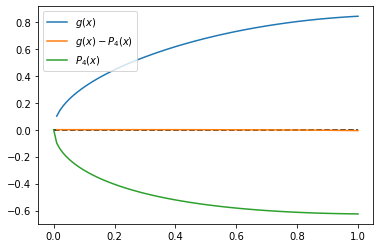

In [7]:
x=Symbol('x')
a=0
b=1

gs=(exp(-x)-1)
den=x**(1/2)
print('fs:',fs)

P4=series(gs,x0=a,n=5,x=None)
P4=P4.removeO()

print('g(x):',gs)
print('P4(x):',P4)

f1s=(gs-P4)/den
f2s=(P4)/den

f1s=expand(f1s)
f2s=expand(f2s)

print('(g(x)-P4)/den:',f1s)
print('P4(x)/den:',f2s)


f=lambdify(x,fs,'numpy')
f1=lambdify(x,f1s,'numpy')
f2=lambdify(x,f2s,'numpy')



xreal=np.linspace(a,b,100)

plt.plot(xreal,f(xreal),label='$g(x)$')
plt.plot(xreal,f1(xreal),label='$g(x)-P_4(x)$')
plt.plot(xreal,f2(xreal),label='$P_4(x)$')
plt.hlines(0,a,b,linestyles='dashed')
plt.legend()

In [8]:
def f1cor(x):
    if x==a:
        return 0
    else:
        return f1(x)
    
intf1=Ar_simp(f1cor,a,b)
intf2=integrate(f2s,(x,a,b))

intf=integrate(x**(-3/2)*(exp(-1/x)-1),(x,1,oo))

print('Area calculada:', intf1+intf2)
print('Area Real', intf.evalf())

Area calculada: -0.506439652692360
Area Real -0.506351734375146


# Integrales por Método de Monte Carlo

$$A_{\text{función}}=\int_{a}^{b} dx f(x)$$

Se puede calcular mediante la proporción

$$\frac{A_{\text{función}}}{A_{\text{rectangulo}}}\approx\frac{N_{\text{aceptaciones}}}{N_{\text{total}}}$$

$$\int_{a}^{b} dx f(x) \approx \frac{N_{\text{aceptaciones}}}{N_{\text{total}}} A_{\text{rectangulo}}$$


### Criterio de aceptación 

0. Generar puntos aleatorios $(Px,Py)$

1. Si $Py>0\to$ Se acepta si $Py<f(Px)$ y $N_{\text{aceptaciones}}=N_{\text{aceptaciones}}+1$

2. Si $Py<0\to$ Se acepta si $Py>f(x)$  y $N_{\text{aceptaciones}}=N_{\text{aceptaciones}}-1$

3. De lo contrario: $(Px,Py)$ se rechaza


Area del rectangulo es 12.5663395460024
Area calculada: -0.02752028360574526
Area por Cuadraturas: (2.615901373506474e-16, 4.471737093238828e-14)


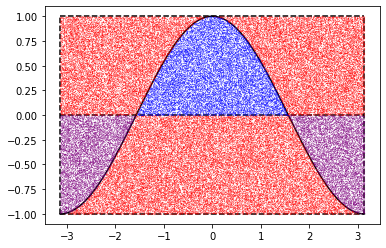

In [19]:
def f(x):
    return np.cos(x)

xmin=-np.pi
xmax=np.pi

x=np.linspace(xmin,xmax,1000)
y=f(x)

ymin=min(y)
ymax=max(y)

Arect=(xmax-xmin)*(ymax-ymin)

print('Area del rectangulo es', Arect)

plt.plot(x,y,color='black')
plt.hlines(0,xmin,xmax,linestyles='dashed')
plt.hlines(ymin,xmin,xmax,linestyles='dashed')
plt.hlines(ymax,xmin,xmax,linestyles='dashed')
plt.vlines(xmin,ymin,ymax,linestyles='dashed')
plt.vlines(xmax,ymin,ymax,linestyles='dashed')

puntos=100000
Np=0
px_up=[]
py_up=[]
px_down=[]
py_down=[]

px_r=[]
py_r=[]


for i in range(puntos):
    px=np.random.uniform(xmin,xmax)
    py=np.random.uniform(ymin,ymax)
    
    if py>0 and(py)<=f(px): #Areas positivas
        px_up.append(px)
        py_up.append(py)
        Np+=1
    elif py<0 and (py)>=f(px): #Areas negativas
        px_down.append(px)
        py_down.append(py)
        Np-=1
    else:
        px_r.append(px)
        py_r.append(py)
        
plt.plot(px_r,py_r,'o',color='red',markersize=0.1)
plt.plot(px_up,py_up,'o',color='blue',markersize=0.1)
plt.plot(px_down,py_down,'o',color='purple',markersize=0.1)


print('Area calculada:', Arect*Np/puntos)
print('Area por Cuadraturas:',integ.quad(f,xmin,xmax))

# Mejorar el cálculo

1. Calcular N veces el area

2. Promediar: $\frac{1}{N} \sum_{k=1}^{N} A_{\text{función, }k}$

In [10]:
def Monte_carlo(f,a,b):
    xmin=a
    xmax=b
    
    x=np.linspace(xmin,xmax,1000)
    y=f(x)
    
    ymin=min(y)
    ymax=max(y)
    
    Arect=(xmax-xmin)*(ymax-ymin)
    
    puntos=10000
    Np=0
    
    for i in range(puntos):
        px=np.random.uniform(xmin,xmax)
        py=np.random.uniform(ymin,ymax)

        if py>0 and(py)<=f(px):
            Np+=1
        elif py<0 and (py)>=f(px):
            Np-=1
        
    return Arect*(Np/puntos)

In [11]:
NAr=100
Ar_array=np.zeros(NAr)

def f(x):
    return np.cos(x)

xmin=-np.pi
xmax=np.pi

for k in tqdm(range(NAr)):
    Ar_array[k]=Monte_carlo(f,xmin,xmax)
    
Ar_prom=sum(Ar_array)/NAr

print('Area promedio calculada:',Ar_prom )
print('Area por Cuadraturas:',integ.quad(f,xmin,xmax))

100%|██████████| 100/100 [00:14<00:00,  6.69it/s]

Area promedio calculada: -0.0036945038265247063
Area por Cuadraturas: (2.615901373506474e-16, 4.471737093238828e-14)


# Otros algoritmos con numeros aleatorios:

1. Cadenas de Markov
2. Algoritmo de Metropolis

# Aplicaciones:

1. Termodinámica.
2. Física Estadística.
3. Decaimientos.